# Fraud Detection - Analysis

# Library Imports

In [340]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

warnings.filterwarnings("ignore")

# Data Import

In [102]:
application_data = pd.read_csv(r'C:\Users\abhasin\Desktop\Fraud-Detection\data\application_data.csv',dtype=object,encoding= 'unicode_escape')
print('application data shape --', application_data.shape)
print('Data Import Success!')

application data shape -- (307511, 122)
Data Import Success!


# Master Data Glimpse - Data Exploration

In [103]:
application_data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Let's just check the Features in the dataset

In [104]:
application_data.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

<br>Now, Computing Missing Values for each Feature in data - also representing the share of <b>Missing Vals in terms of Percentage</b>

In [105]:
def check_nans(df):
    total_nans = df.isna().sum()
    nan_precents = (df.isna().sum()/df.isna().count()*100)
    feature_overview_df  = pd.concat([total_nans, nan_precents], axis=1, keys=['NaN Count', 'NaN Pencent'])
    feature_overview_df['Type'] = [df[c].dtype for c in feature_overview_df.index]
    pd.set_option('display.max_rows', None)
    display(feature_overview_df)
    pd.set_option('display.max_rows', 20)
check_nans(application_data)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.000000,object
TARGET,0,0.000000,object
NAME_CONTRACT_TYPE,0,0.000000,object
CODE_GENDER,0,0.000000,object
FLAG_OWN_CAR,0,0.000000,object
FLAG_OWN_REALTY,0,0.000000,object
CNT_CHILDREN,0,0.000000,object
AMT_INCOME_TOTAL,0,0.000000,object
AMT_CREDIT,0,0.000000,object
AMT_ANNUITY,12,0.003902,object


There's lot of columns having high number of missing values. Based on this, we could further make a decision of taking <b>No-NaN rows for analysis</b>

Let's just check some sample distribution of analysis relevant Features <br><br><b> Distribution of AMT_CREDIT <br>

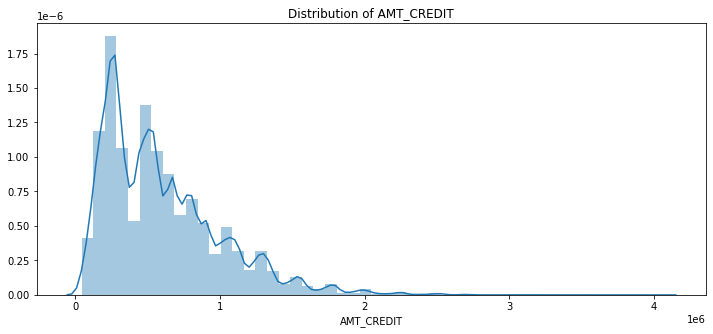

In [106]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_data["AMT_CREDIT"])

<br><b> Distribution of AMT_INCOME_TOTAL<br>

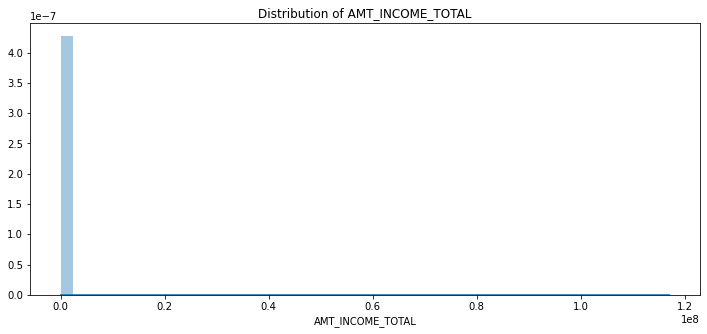

In [107]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_data["AMT_INCOME_TOTAL"].dropna())

<br><b> Distribution of AMT_GOODS_PRICE<br>

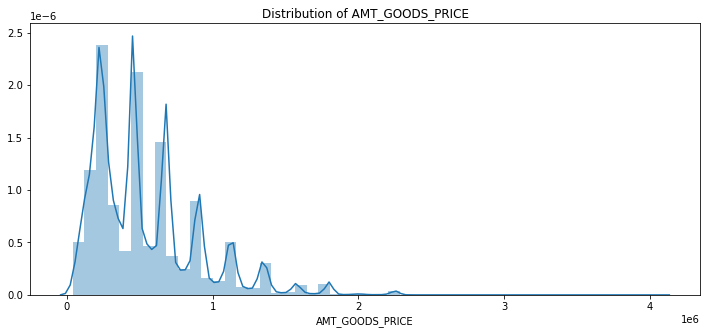

In [108]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_data["AMT_GOODS_PRICE"].dropna())

<br><b> Who accompanied client when applying for the  application in %<br>

In [109]:
temp = application_data["NAME_TYPE_SUITE"].value_counts()
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Who accompanied client when applying for the  application in % ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

<br><b> Types of Loans<br>

In [110]:
temp = application_data["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

<br><b> Income Sources of Loan Applicants<br>

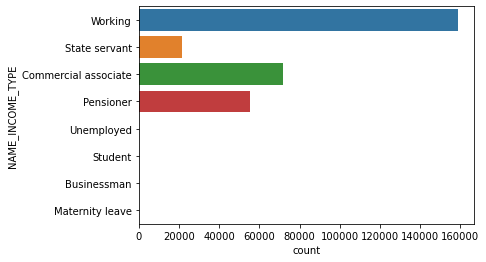

In [111]:
sns.countplot(y="NAME_INCOME_TYPE", data=application_data)

<br><b> Occupation of Loan Applicants<br>

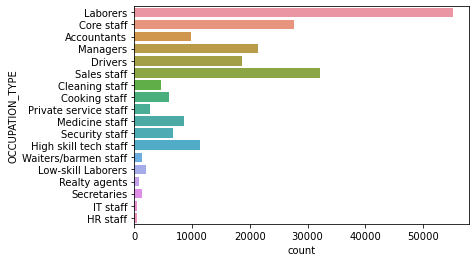

In [112]:
sns.countplot(y="OCCUPATION_TYPE", data=application_data)

<br><b> Type of Houses Applicants Apply For<br>

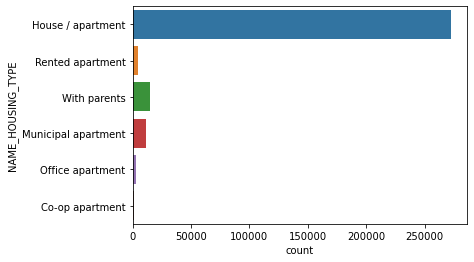

In [113]:
sns.countplot(y="NAME_HOUSING_TYPE", data=application_data)

<br><b> Distribution of Days Employed<br>

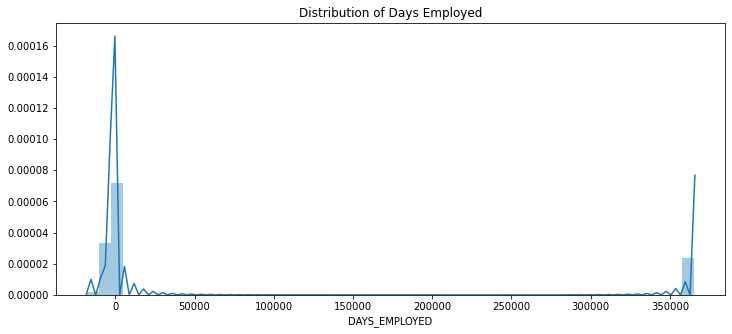

In [114]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Days Employed")
ax = sns.distplot(application_data["DAYS_EMPLOYED"].dropna())

The negative values means Days since employed and most probably these negative values means Unemployed.<br><br>
Some of the values are way higher (350000 approx.)<br><br>
<b>We can filter those in Data Preprocessing part <br> <br>

In [115]:
application_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

As we could see there's significant difference between the classes of Target variable. 
<br> <br>
Let's just see how it looks like on the plot.

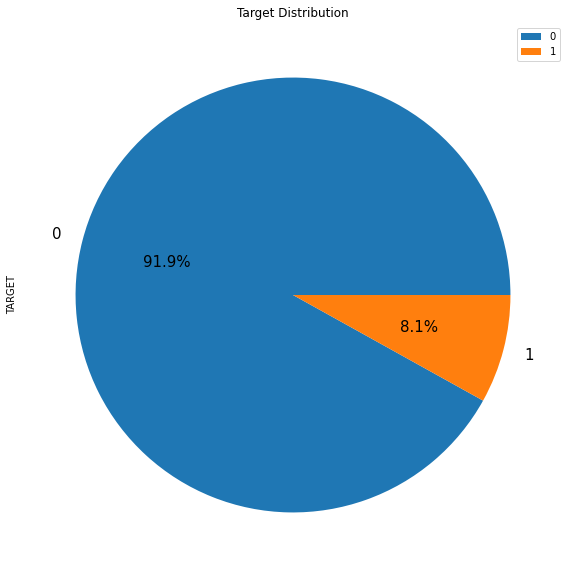

In [116]:
def target_distribution_fn(df):
    target_distribution = df['TARGET'].value_counts()
    target_distribution.plot.pie(figsize=(10, 10),
                                 title='Target Distribution',
                                 fontsize=15, 
                                 legend=True, 
                                 autopct=lambda v: "{:0.1f}%".format(v))
target_distribution_fn(application_data)

As there's visibile difference in classes, we will <b> Undersample </b> the data and take sampled number of values for further analysis.<br><br>
As dataset has lot of values, we can simply <b>Ignore the NaN rows</b> so that we do not need to fill up the space later on. 

# Data Preparation - Undersample Chunk
<br> Removing NaNs from Master data and undersampling data for making it Balanced

In [117]:
def create_undersampled_set(df):
    data_cat_1 = df[df['TARGET'] == '1'][:2000]
    data_cat_0 = df[df['TARGET'] == '0'][:2000]
    final_df = pd.concat([data_cat_1, data_cat_0], axis=0)
    del data_cat_1, data_cat_0
    return final_df
undersample_sample=create_undersampled_set(application_data)

<br><b> Save Undersampled Data - If Not<br><br>

In [67]:
undersample_sample.to_csv(r'C:\Users\abhasin\Desktop\Fraud-Detection-Analysis\data\Data_Chunks\undersample_application_data.csv', index = False)

<br><b> Direct Import Undersampled Data for Analysis<br><br>

In [118]:
undersample_sample =  pd.read_csv(r'C:\Users\abhasin\Desktop\Fraud-Detection-Analysis\data\Data_Chunks\undersample_application_data.csv')

<br><b> Checking Target Val Distribution for Undersampled data<br><br>

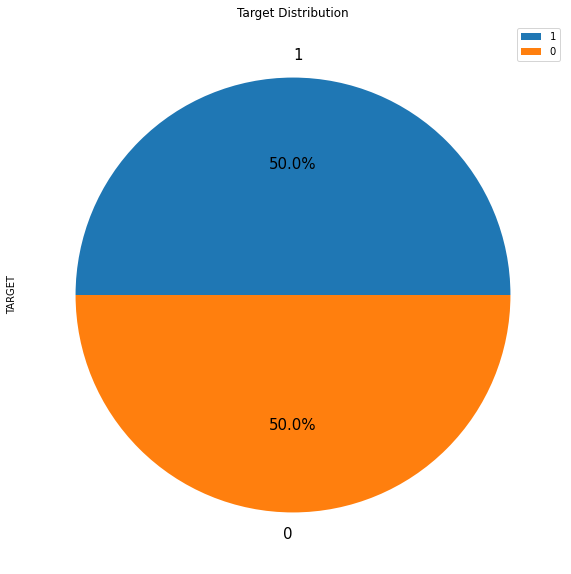

In [119]:
target_distribution_fn(undersample_sample)

Distribution looks perfect and equal now.

<br><b> Checking Missing Vals for Undersampled data<br><br>

In [120]:
check_nans(undersample_sample)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.000,int64
TARGET,0,0.000,int64
NAME_CONTRACT_TYPE,0,0.000,object
CODE_GENDER,0,0.000,object
FLAG_OWN_CAR,0,0.000,object
FLAG_OWN_REALTY,0,0.000,object
CNT_CHILDREN,0,0.000,int64
AMT_INCOME_TOTAL,0,0.000,float64
AMT_CREDIT,0,0.000,float64
AMT_ANNUITY,0,0.000,float64


<br>As we can see, there are lot of columns with heavy number of NaN values. <br>
Getting rid of columns having more than <b>10%</b> of the NaNs.<br><br>

In [233]:
def clear_cols(df, threshold_percent):
    print('No. of Cols Before Drop ---', df.shape[1])
    total_nans = df.isna().sum()
    nan_precents = (df.isna().sum()/df.isna().count()*100)
    feature_overview_df  = pd.concat([total_nans, nan_precents], axis=1, keys=['NaN_Count', 'NaN_Pencent']).reset_index()
    
    cols_above_threshold = feature_overview_df[feature_overview_df['NaN_Pencent'] > threshold_percent]
    cols_to_drop = df.drop(list(cols_above_threshold['index']), axis=1)
    print('No. of Cols After Drop ---', cols_to_drop.shape[1])
    return cols_to_drop
app_data = clear_cols(undersample_sample, threshold_percent=10.0)

No. of Cols Before Drop --- 122
No. of Cols After Drop --- 65


Still our data contains Missing values which we need to get rid-off <br><br>
Writing a <b>Missing Value Filler function</b> for filling with <b> left-over</b> values <br>

Checking Missing Vals again <br>

In [234]:
check_nans(app_data)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.000,int64
TARGET,0,0.000,int64
NAME_CONTRACT_TYPE,0,0.000,object
CODE_GENDER,0,0.000,object
FLAG_OWN_CAR,0,0.000,object
FLAG_OWN_REALTY,0,0.000,object
CNT_CHILDREN,0,0.000,int64
AMT_INCOME_TOTAL,0,0.000,float64
AMT_CREDIT,0,0.000,float64
AMT_ANNUITY,0,0.000,float64


We're good to go ahead <br><br>
<b>Clearing off the remaining missing values now</b>


In [235]:
def missing_val_filler(df):
    for idx in df.columns:
        if str(df[str(idx)].dtype) == 'object':
            df[str(idx)] = df[str(idx)].fillna(df[str(idx)].mode()[0])
        else:
            df[str(idx)] = df[str(idx)].fillna(df[str(idx)].median())
    return df

app_data = missing_val_filler(app_data)
check_nans(app_data)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.0,int64
TARGET,0,0.0,int64
NAME_CONTRACT_TYPE,0,0.0,object
CODE_GENDER,0,0.0,object
FLAG_OWN_CAR,0,0.0,object
FLAG_OWN_REALTY,0,0.0,object
CNT_CHILDREN,0,0.0,int64
AMT_INCOME_TOTAL,0,0.0,float64
AMT_CREDIT,0,0.0,float64
AMT_ANNUITY,0,0.0,float64


<br><br>Handpicking some of the visible Integer based Features and running <b> Box-Plots for Outlier Detection </b><br> <br>

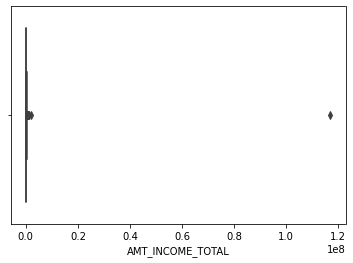

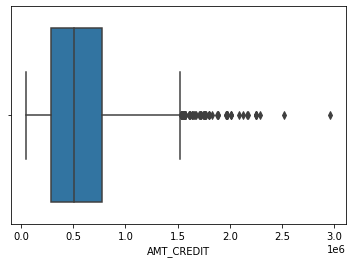

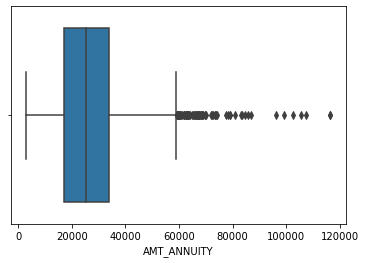

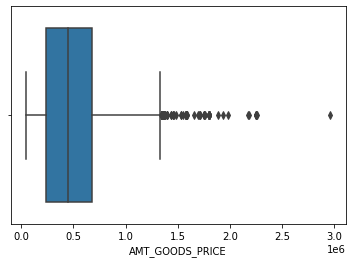

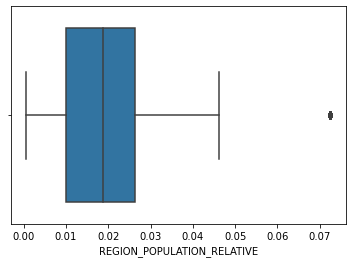

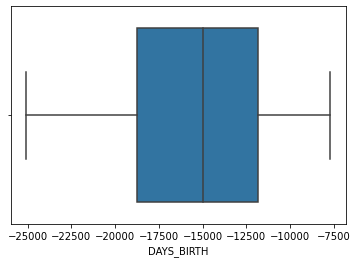

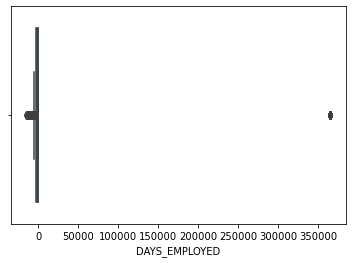

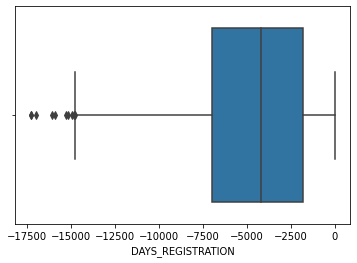

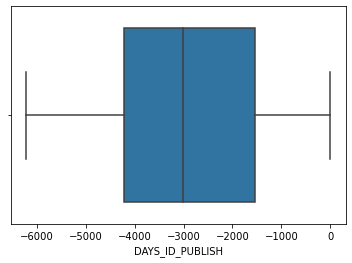

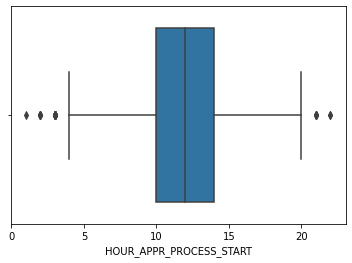

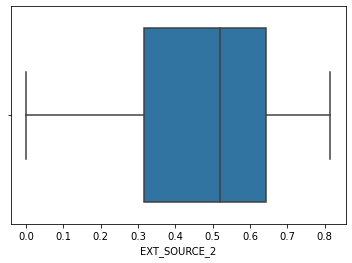

In [237]:
def outlier_plots(df):
    int_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                'HOUR_APPR_PROCESS_START','EXT_SOURCE_2','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
            'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG'
            ,'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE',
            'COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
            'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',
            'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
            'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
            'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']
    
    for idx in int_cols:
        if idx in df.columns:
            if str(df[str(idx)].dtype) != 'object':
                sns.boxplot(df[str(idx)])
                plt.show()

outlier_plots(app_data)

<br><br>Based on looking at the plots of individual Int Features, we can clearly see some of the Amount related Features like <b>AMT_CREDIT AMT_GOODS_PRICE, AMT_ANNUITY, AMT_INCOME_TOTAL</b> contains visible Outliers.<br><br>

Since, we cannot remove Rows with outliers as it will create an imbalance in the dataset. Hence, performing <b>Capping the Outliers </b>.<br>
Capping all the values existing beyond <b>3 * Std + Mean</b> Range.

In [238]:
def outlier_capping(df):
    capping_cols = ['AMT_CREDIT','AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL']
    for idx in capping_cols:
        capping_val = 3*(df[str(idx)].std()) + (df[str(idx)].mean())
        df[str(idx)].loc[df[str(idx)] > capping_val] = capping_val
    return df
        
app_data_=outlier_capping(app_data)

In [239]:
check_nans(app_data_)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.0,int64
TARGET,0,0.0,int64
NAME_CONTRACT_TYPE,0,0.0,object
CODE_GENDER,0,0.0,object
FLAG_OWN_CAR,0,0.0,object
FLAG_OWN_REALTY,0,0.0,object
CNT_CHILDREN,0,0.0,int64
AMT_INCOME_TOTAL,0,0.0,float64
AMT_CREDIT,0,0.0,float64
AMT_ANNUITY,0,0.0,float64


<br><br><b> Feature Engineering & Data-Encoding </b>
<br><br>
Creating some new features -> <b> NEW_CREDIT_TO_ANNUITY_RATIO, NEW_CREDIT_TO_GOODS_RATIO, NEW_PHONE_TO_BIRTH_RATIO</b><br>
ALong with applying <b> One-Hot-Encoder</b>

In [240]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
    return df

def feature_engineering_processing(df):
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, df['DAYS_EMPLOYED'].median(), inplace= True)
    df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['NEW_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
    df['NEW_PHONE_TO_BIRTH_RATIO'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # One-Hot Encoding dataset
    df = one_hot_encoder(df)
    return df

In [241]:
featured_data = feature_engineering_processing(app_data)
featured_data = featured_data.drop(['SK_ID_CURR'], axis=1)

# Data Splitting

Running <b> Data Shuffle </b> along with splitting 

In [322]:
from sklearn.utils import shuffle

Y = featured_data['TARGET']
X = featured_data.drop(['TARGET'], axis=1)

X, Y = shuffle(X, Y)
print(Y.shape)
print(X.shape)
print('-'*40)

X_train = X[:3200]
Y_train = Y[:3200]
X_test = X[3200:]
Y_test = Y[3200:15000]

print('X_train Shape', X_train.shape)
print('Y_train Shape', Y_train.shape)
print('X_test Shape', X_test.shape)
print('Y_test Shape', Y_test.shape)

(4000,)
(4000, 161)
----------------------------------------
X_train Shape (3200, 161)
Y_train Shape (3200,)
X_test Shape (800, 161)
Y_test Shape (800,)


# Data Modeling

<br> <b>Running a baseline 100 estimator Random-Forest along with Feature Importance Plot </b>

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       391
           1       0.64      0.61      0.62       409

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800

----------------------------------------
Baseline Random Forest Accuracy: 62.25000000000001 %


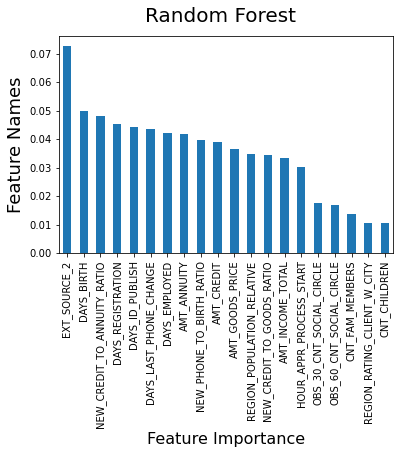

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import classification_report,accuracy_score

randomforest = RandomForestClassifier(n_estimators = 100)
randomforest.fit(X_train, Y_train)
y_pred_rf = randomforest.predict(X_test)
print(classification_report(Y_test, y_pred_rf))
print("-"*40)
print('Baseline Random Forest Accuracy:',accuracy_score(Y_test, y_pred_rf)*100,str('%'))

col_names = list(X_train.columns)
featur_imp = pd.Series(randomforest.feature_importances_, col_names).sort_values(ascending = False)
featur_imp = featur_imp[:20]
featur_imp.plot(kind = 'bar')
plt.suptitle('Random Forest', fontsize=20)
plt.ylabel('Feature Names', fontsize=18)
plt.xlabel('Feature Importance', fontsize=16)
plt.show()

<br><br> <b> ROC_AUC Curve for checking actual accuracy of the model - Random Forest

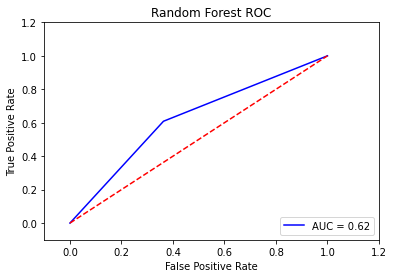

In [341]:
# ROC AUC Curve 
def compute_roc(Y_test,y_pred_rf, label_code):
    actual = Y_test
    predicted = y_pred_rf
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title(label_code)
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
compute_roc(Y_test,y_pred_rf, 'Random Forest ROC')

<br><br> <b> Running Adaboost with Feature Importance <br> <br>

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       391
           1       0.57      0.57      0.57       409

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800

----------------------------------------


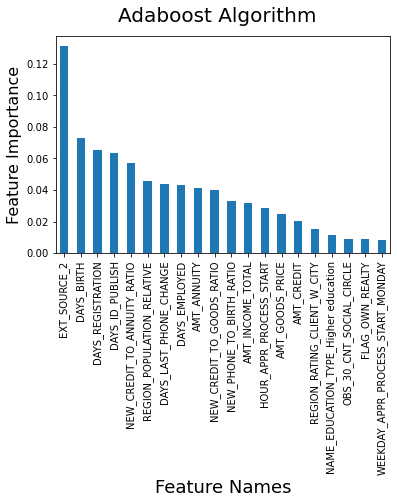

In [336]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=161, base_estimator= dt ,learning_rate=1)
clf.fit(X_train, Y_train)

y_pred_ada = clf.predict(X_test)
print(classification_report(Y_test, y_pred_ada))
print("-"*40)

col_names = list(X_train.columns)
featur_imp = pd.Series(clf.feature_importances_, col_names).sort_values(ascending = False)[:20]
featur_imp.plot(kind = 'bar')
plt.suptitle('Adaboost Algorithm', fontsize=20)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('Feature Importance', fontsize=16)
plt.show()

<br><br> <b> ROC_AUC Curve for Adaboost 

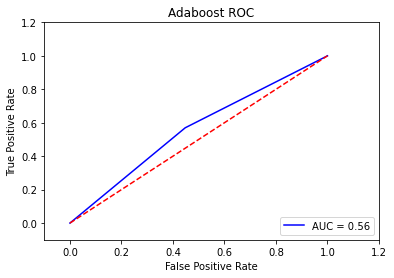

In [342]:
compute_roc(Y_test,y_pred_ada, 'Adaboost ROC')

<br><br> <b> Running Linear SVC <br> <br>

In [338]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
y_pred_Lsvc = linear_svc.predict(X_test)

print("Classification Report")
print("-"*40)
print(classification_report(Y_test, y_pred_Lsvc))

Classification Report
----------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.48      0.51       391
           1       0.56      0.64      0.60       409

    accuracy                           0.56       800
   macro avg       0.56      0.56      0.56       800
weighted avg       0.56      0.56      0.56       800



<br><br> <b> ROC_AUC Curve for Linear SVC 

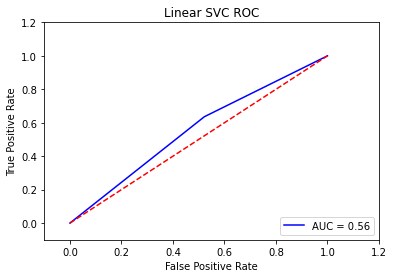

In [343]:
compute_roc(Y_test,y_pred_Lsvc,'Linear SVC ROC')

# Model Inferences & End Notes

<br>Following has been used for analysis:<br><br>

1. <b>Data Glimpse</b> - Data Distribution of some of the continuous variables, Target variable distribution along with other variables, other EDA. 
2. <b>Data Preparation</b> - Balancing the unbalanced dataset, Data chunking.
3. <b>Data Preprocessing</b> - Missing Values Treatment, Outlier detection & Capping, Feature Engineering & Data Encoding.
4. <b>Data Modeling</b> - Baseline Random Forest, Adaboost (Ensemble), Linear SVC. Accuracy measures - AUC_ROC curve, Classification Matrix.

<br>

Random Forest provided better results in terms of accuracy and ROC metric among the 3 classifiers used. Further, parameters can be pipelined for better results.
